## Bibliotecas

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import explained_variance_score

## Preprocessamento

In [42]:
PATH = "data/daily-minimum-temperatures-in-me.csv"
DATE_COLUMN = "Date"

# Lendo os dados
df = pd.read_csv(PATH)

# Convertendo datas
df[DATE_COLUMN] = pd.to_datetime(df[DATE_COLUMN])

# Renomeando colunas
df.columns = ["date", 'temp']

# Convertendo para float
df['temp'] = df['temp'].map(lambda x: float(x.replace("?","")))

# Configurando o indíce
df.index = df["date"]
df.drop("date", axis=1, inplace=True)

## EDA

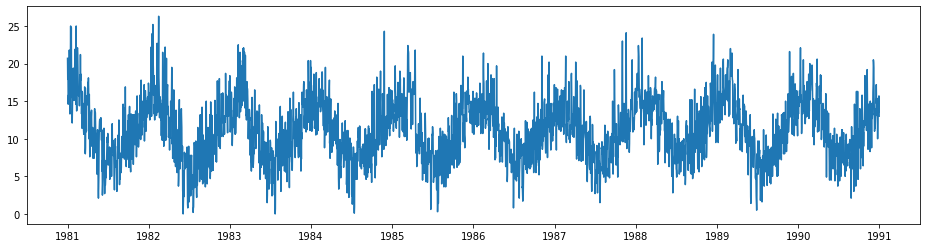

In [43]:
# Olhando a série graficamente
plt.figure(figsize=(16,4))
plt.plot(df.index, df['temp'])
plt.show()

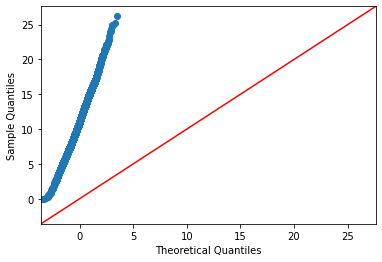

In [44]:
sm.qqplot(df['temp'], line='45')
plt.show()

Necessário normalização

In [45]:
df['nTemp'] = StandardScaler().fit_transform(df['temp'].values.reshape(-1, 1))

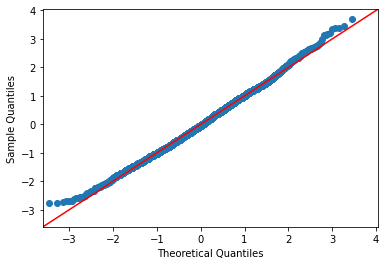

In [46]:
sm.qqplot(df['nTemp'], line='45')
plt.show()

## Modelagem

In [51]:
# dividindo conjunto de treino e teste
train = df.iloc[:-31]
test = df.iloc[-31:]

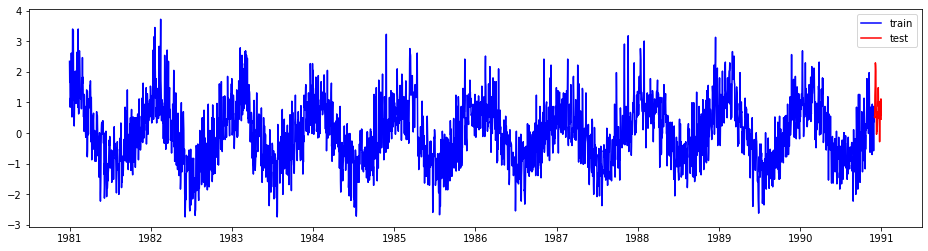

In [56]:
plt.figure(figsize=(16,4))
plt.plot(train.index, train['nTemp'], c='b', label="train")
plt.plot(test.index, test['nTemp'], c='r', label="test")
plt.legend()
plt.show()

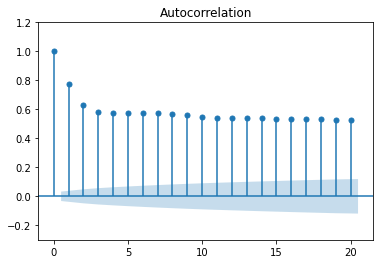

In [64]:
sm.graphics.tsa.plot_acf(train['nTemp'].values.squeeze(), lags=20)
plt.ylim(-0.3,1.2)
plt.show()

Decaimento exponencial aponta modelo auto-regressivo

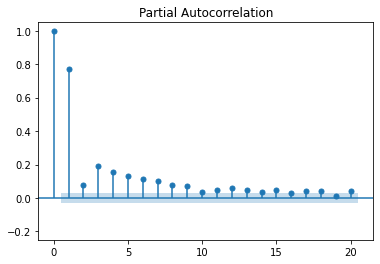

In [65]:
sm.graphics.tsa.plot_pacf(
    train['nTemp'].values.squeeze(), 
    lags=20,
    method='ywm'
)
plt.ylim(-0.25, 1.05)
plt.show()

Cortes em 9 e 15

In [70]:
arima900 = ARIMA(train['nTemp'], order=(9,0,0)).fit()
arima900.params

C:\Users\leand\Downloads\toBlue\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\leand\Downloads\toBlue\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\leand\Downloads\toBlue\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


const     0.011768
ar.L1     0.611351
ar.L2    -0.082798
ar.L3     0.065180
ar.L4     0.054319
ar.L5     0.056562
ar.L6     0.046160
ar.L7     0.061728
ar.L8     0.031142
ar.L9     0.072469
sigma2    0.356014
dtype: float64

In [74]:
arima900.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  nTemp   No. Observations:                 3619
Model:                 ARIMA(9, 0, 0)   Log Likelihood               -3267.089
Date:                Wed, 19 Jan 2022   AIC                           6556.179
Time:                        15:46:36   BIC                           6624.312
Sample:                             0   HQIC                          6580.454
                               - 3619                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0118      0.116      0.101      0.919      -0.216       0.240
ar.L1          0.6114      0.015     40.048      0.000       0.581       0.641
ar.L2         -0.0828      0.019     -4.327      0.000      -0.120      -0.045
ar.L3          0.0652      0.019      3.428      0.001       0.028       0.102
ar.L4          0.0543      0.019      2.822      0.005       0.017       0.092
ar.L5          0.0566      0.019      3.034      0.002       0.020       0.093
ar.L6          0.0462      0.019      2.464      0.014       0.009       0.083
ar.L7          0.0617      0.019      3.317      0.001       0.025       0.098
ar.L8          0.0311      0.019      1.634      0.102      -0.006       0.068
ar.L9          0.0725      0.017      4.284      0.000       0.039       0.106
sigma2         0.3560      0.008     44.984      0.000       0.341       0.372
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                14.27
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.06
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
arima1500 = ARIMA(train['nTemp'], order=(15,0,0)).fit()
arima1500.params

C:\Users\leand\Downloads\toBlue\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\leand\Downloads\toBlue\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\leand\Downloads\toBlue\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


const     0.026312
ar.L1     0.597488
ar.L2    -0.089837
ar.L3     0.055255
ar.L4     0.044365
ar.L5     0.045540
ar.L6     0.033089
ar.L7     0.048666
ar.L8     0.021901
ar.L9     0.044919
ar.L10    0.005519
ar.L11    0.010597
ar.L12    0.029838
ar.L13    0.034468
ar.L14    0.005213
ar.L15    0.050716
sigma2    0.351171
dtype: float64

In [95]:
arima1500.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  nTemp   No. Observations:                 3619
Model:                ARIMA(15, 0, 0)   Log Likelihood               -3242.391
Date:                Wed, 19 Jan 2022   AIC                           6518.783
Time:                        15:59:31   BIC                           6624.080
Sample:                             0   HQIC                          6556.298
                               - 3619                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0263      0.152      0.173      0.862      -0.271       0.324
ar.L1          0.5975      0.015     39.254      0.000       0.568       0.627
ar.L2         -0.0898      0.019     -4.711      0.000      -0.127      -0.052
ar.L3          0.0553      0.019      2.902      0.004       0.018       0.093
ar.L4          0.0444      0.019      2.314      0.021       0.007       0.082
ar.L5          0.0455      0.019      2.458      0.014       0.009       0.082
ar.L6          0.0331      0.019      1.771      0.077      -0.004       0.070
ar.L7          0.0487      0.019      2.608      0.009       0.012       0.085
ar.L8          0.0219      0.019      1.148      0.251      -0.015       0.059
ar.L9          0.0449      0.019      2.320      0.020       0.007       0.083
ar.L10         0.0055      0.019      0.288      0.773      -0.032       0.043
ar.L11         0.0106      0.019      0.560      0.575      -0.026       0.048
ar.L12         0.0298      0.019      1.534      0.125      -0.008       0.068
ar.L13         0.0345      0.019      1.784      0.074      -0.003       0.072
ar.L14         0.0052      0.019      0.282      0.778      -0.031       0.041
ar.L15         0.0507      0.017      3.045      0.002       0.018       0.083
sigma2         0.3512      0.008     44.853      0.000       0.336       0.367
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                15.93
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

escolhe o de menor AIC (AR(15))

Análise dos resíduos

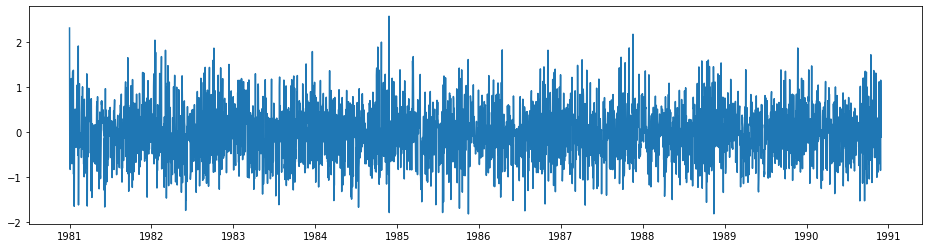

In [100]:
residuos = arima1500.resid
plt.figure(figsize=(16,4))
plt.plot(residuos.index, residuos)
plt.show()

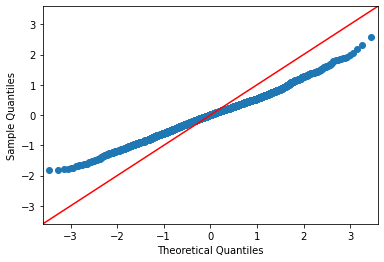

In [101]:
sm.qqplot(residuos, line='45')
plt.show()

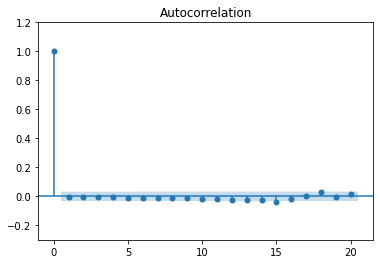

In [102]:
sm.graphics.tsa.plot_acf(residuos.values.squeeze(), lags=20)
plt.ylim(-0.3,1.2)
plt.show()

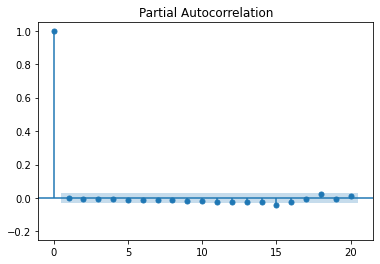

In [103]:
sm.graphics.tsa.plot_pacf(
    residuos.values.squeeze(), 
    lags=20,
    method='ywm'
)
plt.ylim(-0.25, 1.05)
plt.show()

In [105]:
test_arima1500 = ARIMA(
    test['nTemp'], order=(15,0,0)).fit(arima1500.params)

C:\Users\leand\Downloads\toBlue\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\leand\Downloads\toBlue\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\leand\Downloads\toBlue\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


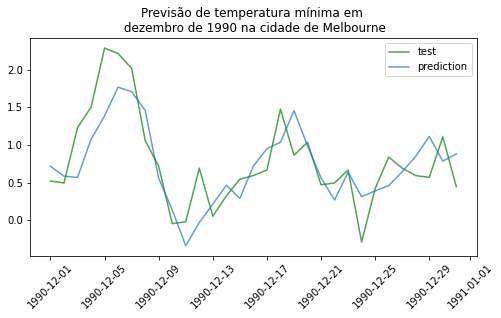

In [110]:
pred = test_arima1500.predict()
plt.figure(figsize=(8,4))
plt.plot(test.index, test['nTemp'], alpha=0.7, color="g", label="test")
plt.plot(pred.index, pred, alpha=0.7, label="prediction")
plt.title("Previsão de temperatura mínima em \n dezembro de 1990 na cidade de Melbourne")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [113]:
# avaliando o modelo
explained_variance_score(test['nTemp'], pred)

0.6013540954456545

Referência:

- https://www.youtube.com/watch?v=82lnU60Irv0&list=PLSDVadsSlXTCVcg95hQsEOVRnVwgaPTRC&index=43